# Running numerous simulations to find estimate of pandemic spread with no control measures

In [25]:
from SEIR_viral_load import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Implementation of Deterministic SIR Model using scipy

In [99]:
#Implementation of Simple Deterministic SIR model (Kermack and McKendrick)

from scipy.integrate import odeint

# Total population, N.
N = 20000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 100, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 1./4, 1./10
# A grid of time points (in days)
t = np.linspace(0, 150, 150)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

### Monte Carlo Simulation of SEIR model (logproportional)

20000 people, no control measures, R0 = 2.5, inital infections= 100, infectiousness measurement = logproportional (log10(viral load)). No external infections. 

In [59]:
S, I, R, Q, SQ, *_ = SEIRsimulation_suppression(20000, 0, 28, 99, logproportional, 0, 1, 1, asymptomatic=0.65,
                               results_delay=0,
                               R0=2.5,
                               cutoff=6,
                               I_init=100,
                               tmax=150,
                               calibration_mode=False)

S, I, R = np.array(S), np.array(I), np.array(R)

In [60]:
for i in range(99):
    S2, I2, R2, Q2, SQ2, *_ = SEIRsimulation_suppression(20000, 0, 28, 99, logproportional, 0, 1, 1, asymptomatic=0.65,
                               results_delay=0,
                               R0=2.5,
                               cutoff=6,
                               I_init=100,
                               tmax=150,
                               calibration_mode=False)
    S += np.asarray(S2)
    I += np.asarray(I2)
    R += np.asarray(R2)    

In [62]:
datadict = {'S' : S, 'I': I, 'R' : R}
first_run = pd.DataFrame(datadict)
first_run = first_run/100 # Scaling for number of iterations

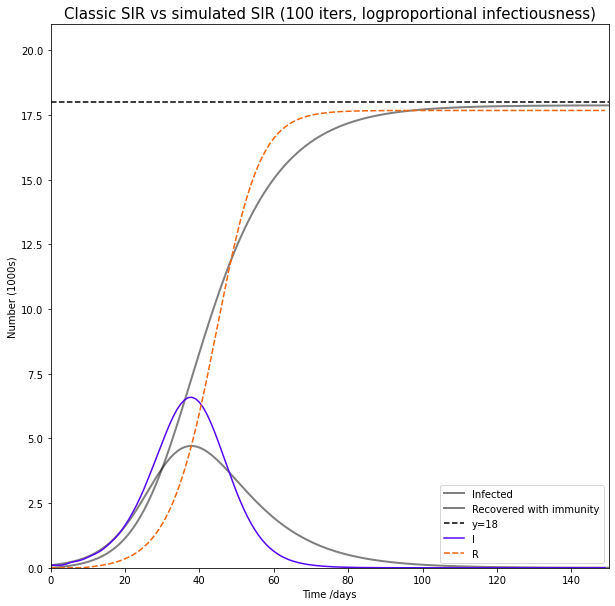

In [105]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, ax = plt.subplots(figsize=(10,10))
#ax.plot(t, S/1000, 'k', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'k', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'k', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_title("Classic SIR vs simulated SIR (100 iters, logproportional infectiousness)", fontsize=15)
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,21)
ax.set_xlim(0,150)
ax.axhline(y=18, linestyle='--', color='k', label='y=18')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(True)
ax = sns.lineplot(data = first_run_scaled[['I', 'R']], palette=['#5506F2', '#F5630A'])

fig.savefig(r'Figures/ClassicVsLogproportional.png')

Same thing as above but with change in infectiousness score

In [80]:
Sp, Ip, Rp, Qp, SQp, *_ = SEIRsimulation_suppression(20000, 0, 28, 99, proportional, 0, 1, 1, asymptomatic=0.65,
                               results_delay=0,
                               R0=2.5,
                               cutoff=6,
                               I_init=100,
                               tmax=150,
                               calibration_mode=False)

Sp, Ip, Rp = np.array(Sp), np.array(Ip), np.array(Rp)

In [83]:
for i in range(99):
    S2p, I2p, R2p, Q2p, SQ2p, *_ = SEIRsimulation_suppression(20000, 0, 28, 99, proportional, 0, 1, 1, asymptomatic=0.65,
                               results_delay=0,
                               R0=2.5,
                               cutoff=6,
                               I_init=100,
                               tmax=150,
                               calibration_mode=False)
    Sp += np.asarray(S2p)
    Ip += np.asarray(I2p)
    Rp += np.asarray(R2p)   

In [95]:
datadictp = {'S' : Sp, 'I': Ip, 'R' : Rp}
second_run = pd.DataFrame(datadictp)
second_run_scaled = second_run/100000 # Scaling for iterations and population

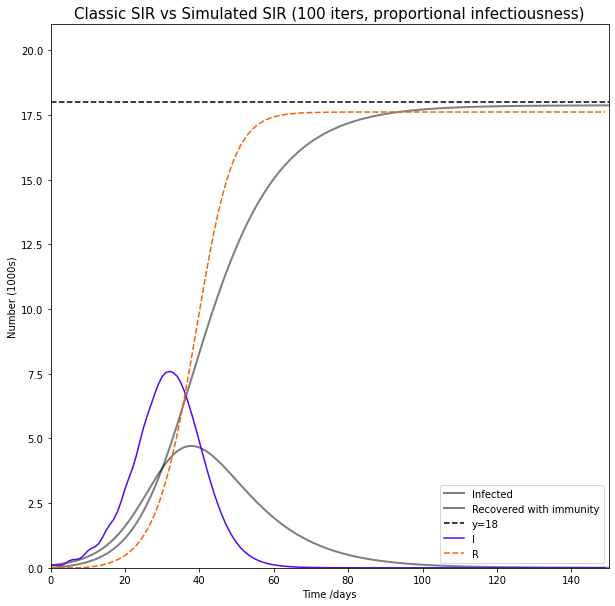

In [111]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, ax = plt.subplots(figsize=(10,10))
#ax.plot(t, S/1000, 'k', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'k', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'k', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_title("Classic SIR vs Simulated SIR (100 iters, proportional infectiousness)", fontsize=15)
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,21)
ax.set_xlim(0,150)
ax.axhline(y=18, linestyle='--', color='k', label='y=18')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(True)
ax = sns.lineplot(data = second_run_scaled[['I', 'R']], palette=['#5506F2', '#F5630A'])
fig.savefig(r'Figures\ClassicVsProportional.png')


### Repeating Process for simple threshold infectiousness

In [113]:
St, It, Rt, Qt, SQt, *_ = SEIRsimulation_suppression(20000, 0, 28, 99, threshold, 0, 1, 1, asymptomatic=0.65,
                               results_delay=0,
                               R0=2.5,
                               cutoff=6,
                               I_init=100,
                               tmax=150,
                               calibration_mode=False)

St, It, Rt = np.array(St), np.array(It), np.array(Rt)

In [114]:
for i in range(99):
    S2t, I2t, R2t, Q2t, SQ2t, *_ = SEIRsimulation_suppression(20000, 0, 28, 99, threshold, 0, 1, 1, asymptomatic=0.65,
                               results_delay=0,
                               R0=2.5,
                               cutoff=6,
                               I_init=100,
                               tmax=150,
                               calibration_mode=False)
    St += np.asarray(S2t)
    It += np.asarray(I2t)
    Rt += np.asarray(R2t)  
    

In [115]:
datadictt = {'S' : St, 'I': It, 'R' : Rt}
third_run = pd.DataFrame(datadictt)

In [116]:
third_run_scaled = third_run/100000 #Scaling for iterations and population

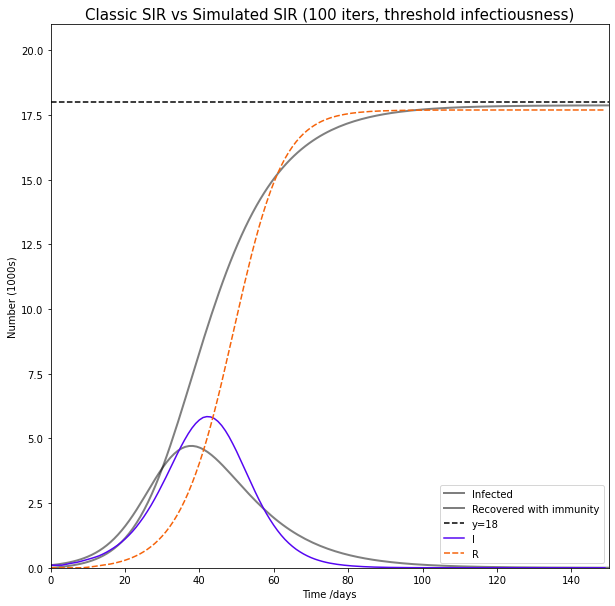

In [117]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, ax = plt.subplots(figsize=(10,10))
#ax.plot(t, S/1000, 'k', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'k', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'k', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_title("Classic SIR vs Simulated SIR (100 iters, threshold infectiousness)", fontsize=15)
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,21)
ax.set_xlim(0,150)
ax.axhline(y=18, linestyle='--', color='k', label='y=18')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(True)
ax = sns.lineplot(data = third_run_scaled[['I', 'R']], palette=['#5506F2', '#F5630A'])
fig.savefig(r'Figures\ClassicVsThreshold.png')